# <font color = 'pickle'> **HW4_Part A  (5 Points):**</font> 

Required Submissions:
1.  Submit  colab/jupyter notebooks only.
2. **Name files as follows : FirstName_hw4_part_A**

<font size = 5, color = 'indianred'>**Refactor the code using Pytorch's nn.Module.** 


In [ ]:
import torch
import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
torch.set_printoptions(precision=4, sci_mode=False)

# <font color = 'pickle'>**. Regression using PyTorch's nn.Module**</font>

Imagine that you're trying to figure out relationship between two variables x and y . You have some idea but you aren't quite sure yet whether the dependence is linear or quadratic. 

Your goal is to use least mean squares regression to identify the coefficients for the following three models using. The three models are:

1. Quadratic model where $\mathrm{y} = b + w_1 \cdot \mathrm{x} + w_2 \cdot \mathrm{x}^2$.
1. Linear model where $\mathrm{y} = b + w_1 \cdot \mathrm{x}$.
1. Linear model with no bias  where $\mathrm{y} = w_1 \cdot \mathrm{x}$.

- You will use batch gradient descent to estimate the model co-efficients. Batch gradient descent uses complete training data at each iteration. 
- We will implement only training loop (no splitting of data in to training/validation).
- The training loop will have only one for loop. We need to iterate over whole data in each epoch. We do not need to craete batches.
- <font color = 'indianred'>**You will use Pytorch's nn.module or functions from Pytorch to refactor the code below**

## <font color = 'pickle'> **Data**

In [ ]:
import torch.nn as nn
from torch.nn import functional as F
from torch.nn import MSELoss

In [ ]:
x = torch.tensor([1.5420291, 1.8935232, 2.1603365, 2.5381863, 2.893443, \
                    3.838855, 3.925425, 4.2233696, 4.235571, 4.273397, \
                    4.9332876, 6.4704757, 6.517571, 6.87826, 7.0009003, \
                    7.035741, 7.278681, 7.7561755, 9.121138, 9.728281])
y = torch.tensor([63.802246, 80.036026, 91.4903, 108.28776, 122.781975, \
                    161.36314, 166.50816, 176.16772, 180.29395, 179.09758, \
                    206.21027, 272.71857, 272.24033, 289.54745, 293.8488, \
                    295.2281, 306.62274, 327.93243, 383.16296, 408.65967])

In [ ]:
y = y.view(-1,1)
x = x.view(-1,1)
x2 = x * x

In [ ]:
x_combined = torch.cat((x,x2), dim = 1)

In [ ]:
mse_loss = torch.nn.MSELoss(reduction = 'mean')

In [ ]:
def init_weights(layer):
  if isinstance(layer, nn.Linear):
    torch.nn.init.normal_(layer.weight, mean = 0, std = 0.01)
    torch.nn.init.zeros_(layer.bias)

## <font color = 'pickle'> **Utility Functions**

### <font color = 'pickle'>**Model Linear Regression**

### <font color = 'pickle'> **Train Function**

In [ ]:
from torch.optim import optimizer

def train(epochs, log_interval, x, y, model, optimizer):
 
  for epoch in range(epochs):
    
    # Step1: forward pass
    
    y_hat = model(x)

    # Step2 : Calculate Loss
    loss = mse_loss(y_hat, y)
    
    #Zero the gradients
    optimizer.zero_grad()
    
    #Calculate Gradients
    loss.backward()

    #Update weights
    optimizer.step()
    
    if(epoch % log_interval ==0):
      print(f'epoch: {epoch + 1} --> loss {loss.item()}')

  return (model.weight, model.bias)
  
 

## <font color = 'pickle'> **Solution 7(1)**

In [ ]:
# model 1  
EPOCHS = 100000
LOG_INTERVAL = 10000
LEARNING_RATE = 0.0005
BIAS = True

model1 = nn.Linear(in_features = 2, out_features=1, bias = BIAS)
optimizer1 = torch.optim.SGD(model1.parameters(), lr = LEARNING_RATE)

w1, b1 = train(EPOCHS, LOG_INTERVAL, x_combined, y, model1, optimizer1)

epoch: 1 --> loss 55602.9296875
epoch: 10001 --> loss 5.200544357299805
epoch: 20001 --> loss 3.194113254547119
epoch: 30001 --> loss 2.187486171722412
epoch: 40001 --> loss 1.6822229623794556
epoch: 50001 --> loss 1.4286458492279053
epoch: 60001 --> loss 1.3012388944625854
epoch: 70001 --> loss 1.2373006343841553
epoch: 80001 --> loss 1.205160140991211
epoch: 90001 --> loss 1.1889984607696533


In [ ]:
print(f' Weights {model1.weight}, \nBias: {model1.bias}')

 Weights Parameter containing:
tensor([[   41.7920,     0.0152]], requires_grad=True), 
Bias: Parameter containing:
tensor([0.9887], requires_grad=True)


## <font color = 'pickle'> **Solution 7(2)**

In [ ]:
# model 2  
EPOCHS = 1000
LOG_INTERVAL = 100
LEARNING_RATE = 0.01
BIAS = True

model2 = nn.Linear(in_features = 1, out_features=1, bias = BIAS)
optimizer2 = torch.optim.SGD(model2.parameters(), lr = LEARNING_RATE)

w2, b2 = train(EPOCHS, LOG_INTERVAL, x, y, model2, optimizer2)

epoch: 1 --> loss 58833.6875
epoch: 101 --> loss 4.211651802062988
epoch: 201 --> loss 2.7330832481384277
epoch: 301 --> loss 1.973862886428833
epoch: 401 --> loss 1.5840375423431396
epoch: 501 --> loss 1.383867859840393
epoch: 601 --> loss 1.2810977697372437
epoch: 701 --> loss 1.2283241748809814
epoch: 801 --> loss 1.2012298107147217
epoch: 901 --> loss 1.187317132949829


In [ ]:
print(f' Weights {w2}, \nBias: {b2}')

 Weights Parameter containing:
tensor([[41.9385]], requires_grad=True), 
Bias: Parameter containing:
tensor([0.7418], requires_grad=True)


## <font color = 'pickle'> **Solution 7(3)**

In [ ]:
# model 3  
EPOCHS = 10
LOG_INTERVAL = 1
LEARNING_RATE = 0.01
BIAS = False

model3 = nn.Linear(in_features = 1, out_features=1, bias = BIAS)
optimizer3 = torch.optim.SGD(model3.parameters(), lr = LEARNING_RATE)

w3, b3 = train(EPOCHS, LOG_INTERVAL, x, y, model3, optimizer3)

epoch: 1 --> loss 58135.7421875
epoch: 2 --> loss 6916.29931640625
epoch: 3 --> loss 823.7677612304688
epoch: 4 --> loss 99.06233978271484
epoch: 5 --> loss 12.85913372039795
epoch: 6 --> loss 2.6052098274230957
epoch: 7 --> loss 1.385508418083191
epoch: 8 --> loss 1.2404361963272095
epoch: 9 --> loss 1.2231695652008057
epoch: 10 --> loss 1.2211188077926636


In [ ]:
print(f' Weights {w3}')

 Weights Parameter containing:
tensor([[42.0557]], requires_grad=True)


## <font color = 'pickle'> **Plot Predictions**

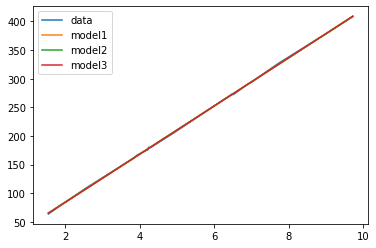

In [ ]:
plt.plot(x.numpy(), y.numpy(), label='data')
plt.plot(x.detach().numpy(), (model1(x_combined)).detach().numpy(), label='model1')
plt.plot(x.detach().numpy(), (model2(x)).detach().numpy(), label='model2')
plt.plot(x.detach().numpy(), (model3(x)).detach().numpy(), label='model3')
plt.legend()
plt.show()
